In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import minimize
from random import gauss

In [9]:
def line_gauss(t, params):
    return np.array([params[0] * coordinate + params[1] + gauss(0, 0.2) for coordinate in t])


def line(t, params):
    return np.array([params[0] * coordinate + params[1] for coordinate in t])


def mse(y_1, y_2):
    return reduce(lambda a, b: a + b, (y_1 - y_2) ** 2)


def mae(y_1, y_2):
    return reduce(lambda a, b: a + b, abs(y_1 - y_2))

Для удобства определим функцию, которую можно будет подставлять в plt.plot

In [3]:
def solve_problem_by(error_function, x_experiment, y_experiment):
    def general_error(a):
        y_test = line(x_experiment, a)
        return error_function(y_test, y_experiment)
    initial = np.array([1, 1, 1])
    result = minimize(general_error, initial, method='nelder-mead')
    return result.x

In [6]:
%matplotlib inline

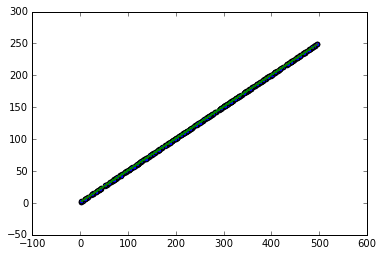

In [11]:
x = np.random.uniform(0, 500, 500)
y = line_gauss(x, [0.5, 1])

plt.plot(x, line(x, solve_problem_by(mse, x, y)), 'r')
plt.plot(x, line(x, solve_problem_by(mae, x, y)), 'g')
plt.scatter(x, y)

Очень много точек в обучающей выборке, поэтому обе кривые приблизили очень хорошо. Нужно добавить выбросов.

In [12]:
x1 = np.random.uniform(0, 500, 75)
y1 = line_gauss(x1, [0, -1])
x = np.concatenate((x, x1))
y = np.concatenate((y, y1))

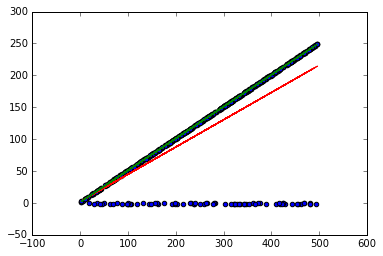

In [13]:
plt.scatter(x, y)
plt.plot(x, line(x, solve_problem_by(mse, x, y)), 'r')
plt.plot(x, line(x, solve_problem_by(mae, x, y)), 'g')

Видно, что mae более устойчива лучше, так и должно быть, это следует из свойств медианы. 